In [52]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

random.seed(453)
df = pd.read_csv("bench.csv")
df.dropna(inplace=True)
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [53]:
df.shape

(31321, 15)

In [54]:
df = pd.get_dummies(df)
df.shape

(31321, 108)

In [55]:
labels  = np.array(df["O"])
df = df.drop("O", axis=1)
df.shape

(31321, 107)

In [56]:
train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size=0.2, random_state=42)
print("Train_x Shape:", train_x.shape)
print("Train_x Shape:", train_y.shape)
print("Train_x Shape:", test_x.shape)
print("Train_x Shape:", test_y.shape)

Train_x Shape: (25056, 107)
Train_x Shape: (25056,)
Train_x Shape: (6265, 107)
Train_x Shape: (6265,)


In [57]:
logi_reg = LogisticRegression()
logi_reg.fit(train_x, train_y)
pred = logi_reg.predict(test_x)
confusion_matrix = confusion_matrix(test_y, pred)
print(confusion_matrix)
y_pred_prob = logi_reg.predict_proba(test_x)[:,1]
print(roc_auc_score(test_y, y_pred_prob))

[[4617  143]
 [1105  400]]
0.5798037354476674


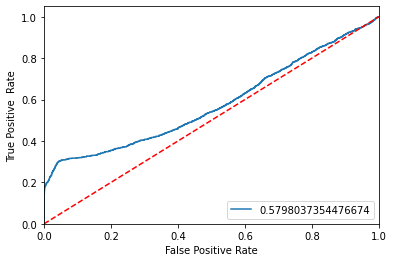

In [85]:
# Plot
logit_roc_auc = roc_auc_score(test_y, logi_reg.predict_proba(test_x)[:,1])
fpr, tpr, thresholds = roc_curve(test_y, logi_reg.predict_proba(test_x)[:,1])
plt.figure()

plt.plot(fpr, tpr, label = logit_roc_auc)
plt.plot([0,1], [0,1], "r--")

plt.xlim([0, 1])
plt.ylim([0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive  Rate")

plt.legend(loc="lower right")
plt.savefig("Log_Roc")
plt.show()